In [ ]:
# [Cell 1] Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

In [3]:
# [Cell 2] Load data - keep separate
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
# [Cell 3] Data Cleaning - clean them separately but consistently

def clean_data(df):
    # Make a copy to avoid SettingWithCopyWarning
    df = df.copy()
    
    # Handle missing values
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df.drop('Cabin', axis=1, inplace=True)
    
    # Remove duplicates
    df.drop_duplicates(inplace=True)
    
    return df

train_cleaned = clean_data(train_df)
test_cleaned = clean_data(test_df)

# Save cleaned data
train_cleaned.to_csv('cleaned_train.csv', index=False)
test_cleaned.to_csv('cleaned_test.csv', index=False)

/var/folders/qq/1g57sy5s79b87y6msw_ry0rh0000gn/T/ipykernel_85996/3926550667.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/qq/1g57sy5s79b87y6msw_ry0rh0000gn/T/ipykernel_85996/3926550667.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

Training Data Summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


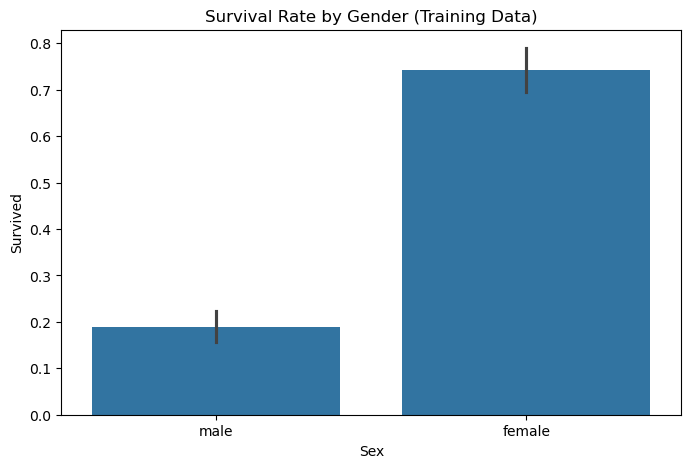

In [5]:
# [Cell 4] EDA - Only on training data
print("Training Data Summary:")
print(train_cleaned.describe())

# Visualizations (same as before but using train_cleaned)
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=train_cleaned)
plt.title('Survival Rate by Gender (Training Data)')
plt.show()

In [7]:
# [Cell 5] Feature Engineering - Apply same transformations to both sets

def create_features(df):
    df = df.copy()
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = 0
    df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    df['Title'] = df['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
    return df

train_featured = create_features(train_cleaned)
test_featured = create_features(test_cleaned)

<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
/var/folders/qq/1g57sy5s79b87y6msw_ry0rh0000gn/T/ipykernel_85996/1287724189.py:8: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [8]:
# [Cell 6] Model Training and Validation
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']
X_train = train_featured[features]
y_train = train_featured['Survived']

# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
# [Cell 7] Validation Evaluation
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.8324022346368715

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.81      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



In [11]:
# [Cell 8] Final Model Training (on full training data)

# First, prepare the full training data with all features
X_train_full = train_featured[features]  # Using all cleaned & featured training data
y_train_full = train_featured['Survived']  # All corresponding labels

# Initialize and train the final model
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train_full, y_train_full)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
# [Cell 9] Test Set Predictions
X_test = test_featured[features]
test_predictions = final_model.predict(X_test)

# Create submission file (for Kaggle format)
submission = pd.DataFrame({
    'PassengerId': test_featured['PassengerId'],
    'Survived': test_predictions
})
submission.to_csv('titanic_submission.csv', index=False)

In [13]:
# [Cell 10] Save model for UI
import joblib
joblib.dump(final_model, 'titanic_model.pkl')

print("Model trained on full dataset and saved successfully!")
print(f"Training accuracy: {final_model.score(X_train_full, y_train_full):.2f}")

Model trained on full dataset and saved successfully!
Training accuracy: 0.98
